# Report 1
## Sorting algorithms

#### Marcin Kapiszewski 156048
#### Adam Tomys 156057

Group 2

### Compared algoritms:

1. Naive:
    - bubble sort: algorithm compares every two adjacent elements starting from the right n times and if right element is smaller it swaps their indexes. In every iteration, on average, one element moves into its place.
    - insertion sort: algorithm iterates over all elements starting from the left and moves them left until the subarray from start to the starting index of that given element is sorted.
2. Divide & conquere:
    - quick sort: algorithm chooses a pivot, and places all lower values on the left, and bigger values on the right, creating two subarrays. Then the process is repeated for each subarray until all of them have 0 or 1 elements meaning that the are sorted.
    - heap sort:
3. Other:
    - counting sort: algorithm counts number of occurrences of each integer and stores it in a list, then it creates a cumulative sum of elements in that list. Finally, it initializes an output array, iterates over input list and places elements in the correct indexes using the list created in the first step.

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from Program_Evaluation.Generate_input import *
from Sorting_algorithms.Bubble_sort import bubble_sort
from Sorting_algorithms.Quick_sort import quick_sort
from Sorting_algorithms.Insertion_sort import insert_sort
from Sorting_algorithms.Counting_sort import counting_sort
from Sorting_algorithms.Heap_sort import heap_sort
from Program_Evaluation.Evaluate_program import evaluate_program
from Vizualization.Vizualization import compare_sorting_times
import sys

In [13]:
sys.setrecursionlimit(int(1e8))

In [14]:
SORTS = (quick_sort, heap_sort, counting_sort, bubble_sort, insert_sort)
INPUT_TYPES = ('generate_random', generate_increasing, generate_decreasing, generate_v_shape)
INPUT_DENSITIES = ('generate_standard', generate_condense, generate_sparse)
INPUT_SIZES = [100, 1_000, 2_000, 5_000]
STANDARD_SIZE = 5_000
generate_standard = generate_random

In [15]:
def get_times(sort):
    time_size = {}
    for input_size in INPUT_SIZES:
        time_size[input_size] = evaluate_program(sort, generate_standard, input_size)

    time_type = {"generate_random": time_size[STANDARD_SIZE]}
    for input_type in INPUT_TYPES[1:]:       
        time_type[input_type.__name__] = evaluate_program(sort, input_type)
    
    time_density = {"generate_standard": time_size[STANDARD_SIZE]}
    for input_density in INPUT_DENSITIES[1:]:
        time_density[input_density.__name__] = evaluate_program(sort, input_density)

    return time_size, time_type, time_density

In [16]:
times = {}
for sort in SORTS:
    times[sort.__name__] = get_times(sort)

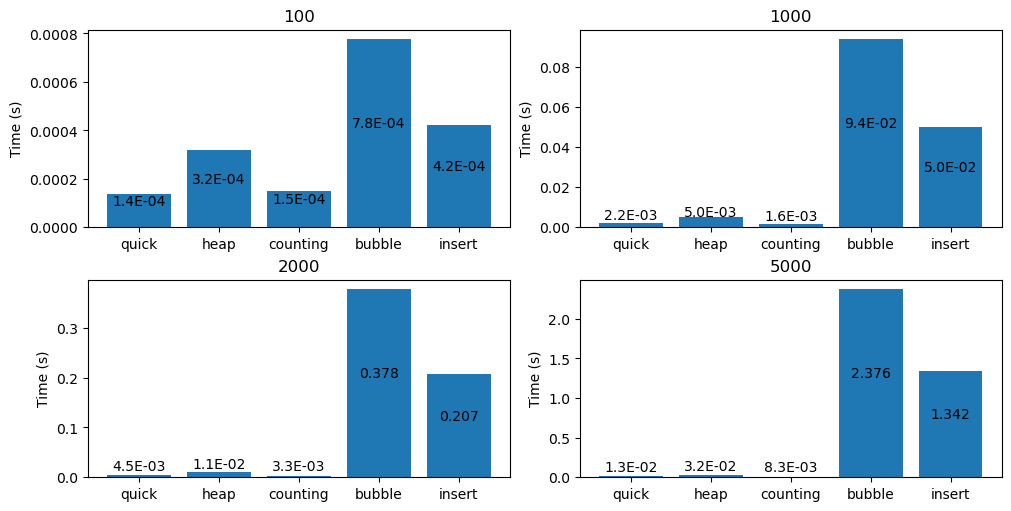

In [41]:
compare_sorting_times(INPUT_SIZES, times, 0)

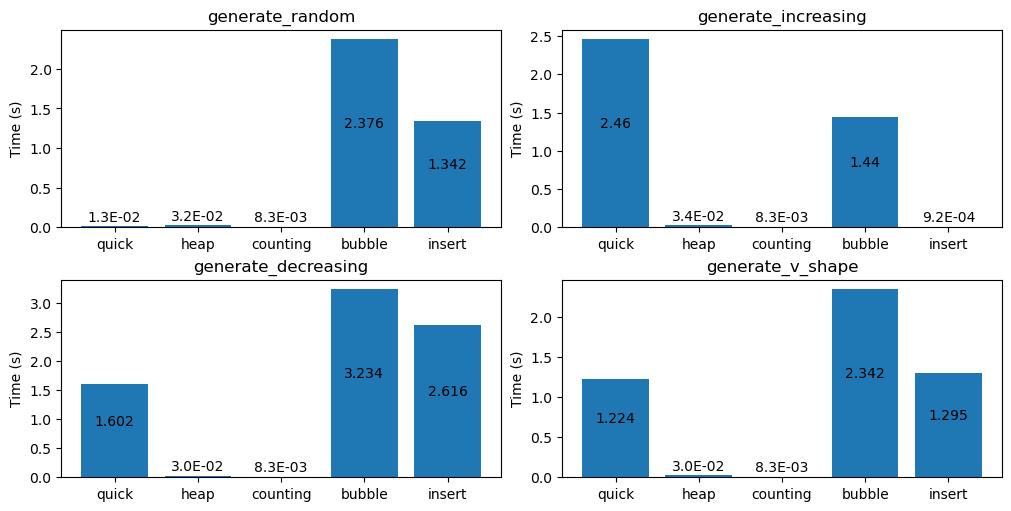

In [42]:
compare_sorting_times(INPUT_TYPES, times, 1)

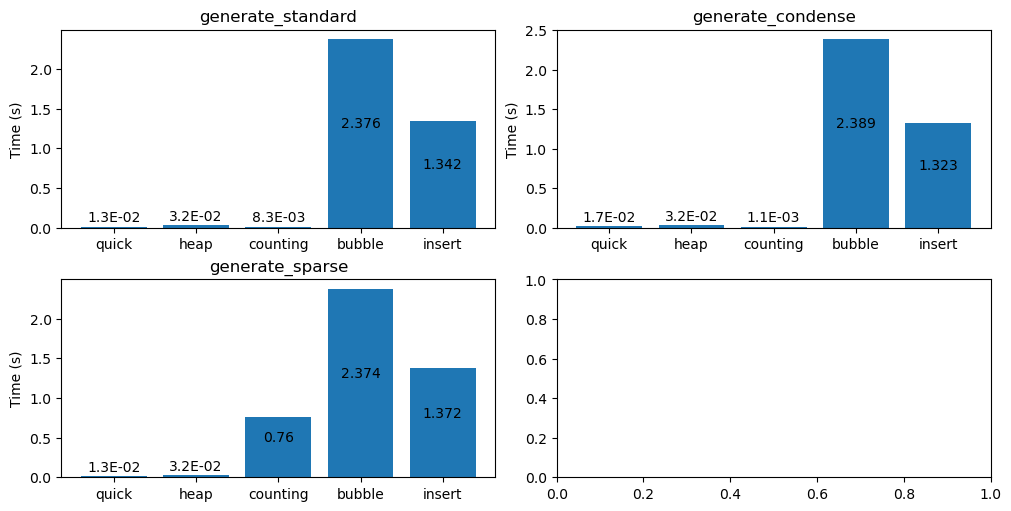

In [43]:
compare_sorting_times(INPUT_DENSITIES, times, 2)